In [ ]:
from google.colab import drive
drive.mount('/mydrive')

Mounted at /mydrive


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
tweets_real = pd.read_csv('/mydrive/MyDrive/CMPE255/training.1600000.processed.noemoticon.csv', encoding='ISO-8859-1', header=0)
troll_1 = pd.read_csv('/mydrive/MyDrive/CMPE255/IRAhandle_tweets_1.csv')
troll_2 = pd.read_csv('/mydrive/MyDrive/CMPE255/IRAhandle_tweets_2.csv')
troll_3 = pd.read_csv('/mydrive/MyDrive/CMPE255/IRAhandle_tweets_3.csv')
troll_4 = pd.read_csv('/mydrive/MyDrive/CMPE255/IRAhandle_tweets_4.csv')
troll_5 = pd.read_csv('/mydrive/MyDrive/CMPE255/IRAhandle_tweets_5.csv')
troll_6 = pd.read_csv('/mydrive/MyDrive/CMPE255/IRAhandle_tweets_6.csv')
troll_7 = pd.read_csv('/mydrive/MyDrive/CMPE255/IRAhandle_tweets_7.csv')
troll_8 = pd.read_csv('/mydrive/MyDrive/CMPE255/IRAhandle_tweets_8.csv')
troll_9 = pd.read_csv('/mydrive/MyDrive/CMPE255/IRAhandle_tweets_1.csv')

In [ ]:
tweets_real = pd.read_csv('/mydrive/MyDrive/CMPE255/training.1600000.processed.noemoticon.csv', encoding='ISO-8859-1', names=['index', 'id', 'date', 'query', 'author', 'content'])

tweets_real.head()

,index,id,date,query,author,content
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [ ]:
troll_frames = [troll_1, troll_2, troll_3, troll_4, troll_5, troll_6, troll_7, troll_8, troll_9]
troll_tweets = pd.concat(troll_frames)
troll_tweets.head()

,external_author_id,author,content,region,language,publish_date,harvested_date,following,followers,updates,post_type,account_type,new_june_2018,retweet,account_category
0,9.060000e+17,10_GOP,"""We have a sitting Democrat US Senator on tria...",Unknown,English,10/1/2017 19:58,10/1/2017 19:59,1052,9636,253,NaN,Right,0,0,RightTroll
1,9.060000e+17,10_GOP,Marshawn Lynch arrives to game in anti-Trump s...,Unknown,English,10/1/2017 22:43,10/1/2017 22:43,1054,9637,254,NaN,Right,0,0,RightTroll
2,9.060000e+17,10_GOP,Daughter of fallen Navy Sailor delivers powerf...,Unknown,English,10/1/2017 22:50,10/1/2017 22:51,1054,9637,255,RETWEET,Right,0,1,RightTroll
3,9.060000e+17,10_GOP,JUST IN: President Trump dedicates Presidents ...,Unknown,English,10/1/2017 23:52,10/1/2017 23:52,1062,9642,256,NaN,Right,0,0,RightTroll
4,9.060000e+17,10_GOP,"19,000 RESPECTING our National Anthem! #StandF...",Unknown,English,10/1/2017 2:13,10/1/2017 2:13,1050,9645,246,RETWEET,Right,0,1,RightTroll


In [ ]:
troll_tweets = troll_tweets[troll_tweets['language'] == 'English']
troll_tweets = troll_tweets.sample(frac=0.66, replace=False, random_state=1)
troll_tweets.shape

(1587291, 15)

In [ ]:
troll_tweets = troll_tweets[['author', 'content']]
troll_tweets['class'] = 1
troll_tweets.head()

,author,content,class
358607,WORLDOFHASHTAGS,Nobody will miss it. #2016In4Words,1
40918,PUREDAVIE,"Yesterday's just a memory, tomorrow is never w...",1
91047,TODAYCINCINNATI,Rue 21 closing three local stores https://t.co...,1
59670,ALECMOOOOODY,Howdy man! � Send me msg ➡ https://t.co/NUdzdx...,1
373400,KANSASDAILYNEWS,Film company guilty in ‘Star Wars’ accident th...,1


In [ ]:
tweets_real.head()

,index,id,date,query,author,content
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [ ]:
tweets_real = tweets_real[['author', 'content']]
tweets_real['class'] = 0
tweets_real.head()

,author,content,class
0,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,scotthamilton,is upset that he can't update his Facebook by ...,0
2,mattycus,@Kenichan I dived many times for the ball. Man...,0
3,ElleCTF,my whole body feels itchy and like its on fire,0
4,Karoli,"@nationwideclass no, it's not behaving at all....",0


In [ ]:
frames = [tweets_real, troll_tweets]
tweets_w_auth = pd.concat(frames)
tweets_w_auth.head()

,author,content,class
0,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,scotthamilton,is upset that he can't update his Facebook by ...,0
2,mattycus,@Kenichan I dived many times for the ball. Man...,0
3,ElleCTF,my whole body feels itchy and like its on fire,0
4,Karoli,"@nationwideclass no, it's not behaving at all....",0


In [ ]:
tweets_w_auth.tail()

,author,content,class
55140,BRISSTOFLR,Are You Sitting Down? You WON’T BELIEVE This W...,1
217055,JADONHUTCHINSON,January 2016 TV Pilot/Spec Screenplay Winners ...,1
52761,ALBUQUERQUEON,New Mexico governor outlines state budget prop...,1
241265,MIL0BLAKE,"News post: ""THE PAST IS ANOTHER COUNTRY, BUT W...",1
147332,ANDYDREWDANIELS,#GiftIdeasForPoliticians Pokemon Go https://t....,1


In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = stopwords.words('english')
tweets_w_auth['content'] = tweets_w_auth['content'].apply(
    lambda x: ' '.join([word for word in (str(x)).split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
tweets_w_auth.content.str.replace('[^a-zA-Z\s]', '')

0         switchfoot httptwitpiccomyzl  Awww thats bumme...
1         upset cant update Facebook texting it might cr...
2         Kenichan I dived many times ball Managed save ...
3                          whole body feels itchy like fire
4         nationwideclass no behaving all im mad here I ...
                                ...                        
55140     Are You Sitting Down You WONT BELIEVE This WAP...
217055    January  TV PilotSpec Screenplay Winners https...
52761     New Mexico governor outlines state budget prop...
241265    News post THE PAST IS ANOTHER COUNTRY BUT WE D...
147332    GiftIdeasForPoliticians Pokemon Go httpstcopNa...
Name: content, Length: 3187291, dtype: object

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

In [ ]:
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(tweets_w_auth['content'])
tweets_w_auth['content'] = tokenizer.texts_to_sequences(tweets_w_auth['content'])

In [ ]:
author_tokenizer = tf.keras.preprocessing.text.Tokenizer()
author_tokenizer.fit_on_texts(tweets_w_auth['author'])
tweets_w_auth['author'] = author_tokenizer.texts_to_sequences(tweets_w_auth['author'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


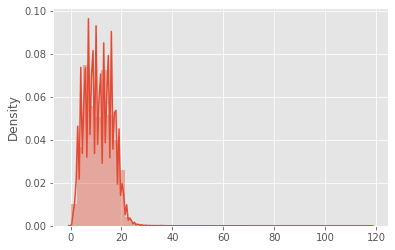

In [ ]:
X_lens = [len(x) for x in tweets_w_auth['content'].values]
X_lens = np.array(X_lens)
sns.distplot(X_lens)

In [ ]:
print(np.mean(X_lens), np.std(X_lens))

11.121873716582515 5.198424843095162


In [ ]:
MAX_CONTENT_LENGTH = 21
np.unique((X_lens >= MAX_CONTENT_LENGTH), return_counts=True)

(array([False,  True]), array([3099017,   88274]))

In [ ]:
3099017/(3099017+88274)

0.972304380114649

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


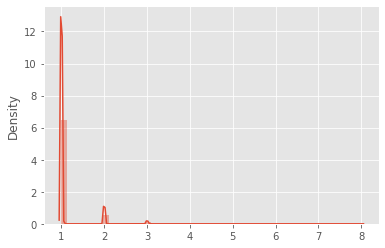

In [ ]:
Y_lens = [len(x) for x in tweets_w_auth['author'].values]
Y_lens = np.array(Y_lens)
sns.distplot(Y_lens)

In [ ]:
print(np.mean(Y_lens), np.std(Y_lens))

1.1048416978556397 0.3511222390797303


In [ ]:
MAX_AUTHOR_LENGTH = 3
np.unique((Y_lens >= MAX_AUTHOR_LENGTH), return_counts=True)


(array([False,  True]), array([3145156,   42135]))

In [ ]:
3145156/(3145156+42135)

0.9867803096736382

In [ ]:
labels = tweets_w_auth.pop('class')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(tweets_w_auth, labels)

In [ ]:
X_train_author = X_train.pop('author')
X_test_author = X_test.pop('author')

X_train_content = X_train.pop('content')
X_test_content = X_test.pop('content')

In [ ]:
X_train_author = tf.keras.preprocessing.sequence.pad_sequences(X_train_author,
                                                               maxlen=MAX_AUTHOR_LENGTH,
                                                               padding='post',
                                                               truncating='post')
X_test_author = tf.keras.preprocessing.sequence.pad_sequences(X_test_author,
                                                              maxlen=MAX_AUTHOR_LENGTH,
                                                              padding='post',
                                                              truncating='post')

In [ ]:
X_train_content = tf.keras.preprocessing.sequence.pad_sequences(X_train_content,
                                                                maxlen=MAX_CONTENT_LENGTH,
                                                                padding='post',
                                                                truncating='post')
X_test_content = tf.keras.preprocessing.sequence.pad_sequences(X_test_content,
                                                               maxlen=MAX_CONTENT_LENGTH,
                                                               padding='post',
                                                               truncating='post')

In [ ]:

author_input = tf.keras.layers.Input(shape=(MAX_AUTHOR_LENGTH,), name = 'author_input')
author_embed = tf.keras.layers.Embedding(len(author_tokenizer.index_word)+1, 50, input_length=MAX_AUTHOR_LENGTH, name='author_embedding')(author_input)
author_conv = tf.keras.layers.Conv1D(256, 3, name='author_conv')(author_embed)
author_pool = tf.keras.layers.GlobalMaxPooling1D(name='author_pooling')(author_conv)
vector_input = tf.keras.layers.Input(shape=(21,), name='twitter_input')
concat = tf.keras.layers.concatenate([author_pool, vector_input])
dense_100 = tf.keras.layers.Dense(100, activation='relu')(concat)
dense_50 = tf.keras.layers.Dense(50, activation='relu')(dense_100)
out_layer = tf.keras.layers.Dense(1, activation='sigmoid')(dense_50)
model = tf.keras.models.Model(inputs=[author_input, vector_input], outputs=out_layer)
model.summary()
model.compile(optimizer=tf.keras.optimizers.Adam(0.0005),
              loss='binary_crossentropy',
              metrics=['accuracy'])

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
author_input (InputLayer)       [(None, 3)]          0                                            
__________________________________________________________________________________________________
author_embedding (Embedding)    (None, 3, 50)        31880850    author_input[0][0]               
__________________________________________________________________________________________________
author_conv (Conv1D)            (None, 1, 256)       38656       author_embedding[0][0]           
__________________________________________________________________________________________________
author_pooling (GlobalMaxPoolin (None, 256)          0           author_conv[0][0]                
_______________________________________________________________________________________

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',
                                            patience=5,
                                            mode='max',
                                          restore_best_weights=True)
history = model.fit([X_train_author, X_train_content, X_train],
                     y_train,
                     epochs=10,
                     batch_size=8192,
                     validation_data=(
                           [X_test_author, X_test_content, X_test],
                            y_test
                     ),
callbacks=[callback])

Epoch 1/10
292/292 [==============================] - 90s 308ms/step - loss: 4.4387 - accuracy: 0.9986 - val_loss: 5.8635 - val_accuracy: 0.9983
Epoch 2/10
292/292 [==============================] - 90s 307ms/step - loss: 2.9994 - accuracy: 0.9989 - val_loss: 5.4300 - val_accuracy: 0.9982
Epoch 3/10
292/292 [==============================] - 90s 309ms/step - loss: 2.2528 - accuracy: 0.9991 - val_loss: 4.5360 - val_accuracy: 0.9986
Epoch 4/10
292/292 [==============================] - 87s 298ms/step - loss: 1.6081 - accuracy: 0.9993 - val_loss: 4.5185 - val_accuracy: 0.9987
Epoch 5/10
292/292 [==============================] - 88s 300ms/step - loss: 1.2721 - accuracy: 0.9994 - val_loss: 3.9997 - val_accuracy: 0.9987
Epoch 6/10
292/292 [==============================] - 87s 298ms/step - loss: 0.9475 - accuracy: 0.9995 - val_loss: 3.8018 - val_accuracy: 0.9987
Epoch 7/10
292/292 [==============================] - 87s 296ms/step - loss: 0.7663 - accuracy: 0.9996 - val_loss: 3.7466 - val_ac

In [ ]:
preds = model.predict([X_test_author, X_test_content, X_test])

In [ ]:
model.evaluate([X_test_author, X_test_content, X_test], y_test)

24901/24901 [==============================] - 47s 2ms/step - loss: 3.2693 - accuracy: 0.9989


[3.2692904472351074, 0.9988793134689331]

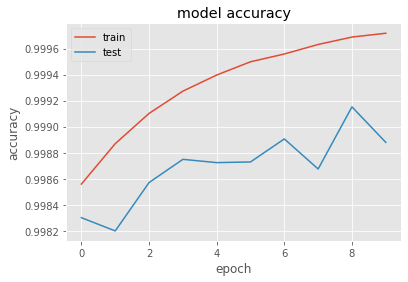

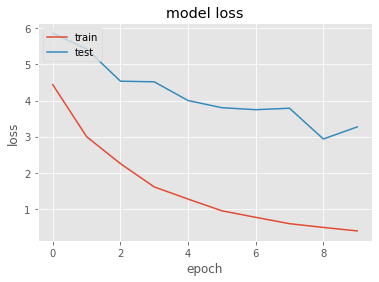

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()